In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('diabetic_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

There are total 50 features

In [3]:
print('In the dataset there are 50 columns')
df_cat = df.select_dtypes(include=object)
df_num = df.select_dtypes(include=np.number)
print(f'Total categorical columns: ',len(df_cat.columns))
print(f'Categorical columns: ',df_cat.columns)
print(f'Total numerical columns : ',len(df_num.columns))
print(f'Numerical columns:',df_num.columns)

In the dataset there are 50 columns
Total categorical columns:  37
Categorical columns:  Index(['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')
Total numerical columns :  13
Numerical columns: Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outp

In [4]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

There are non-existent null values except two columns: max_glu_serum and A1Cresult. We'll need to handle these missing values.

Check for illegal or special character in the dataset, that we noticed while skimming through the dataset

In [5]:
for col in df.columns:
  if df[col].dtype == object:
    print(col,df[col][df[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


There are non-existent special character values except seven columns:
1. weight
2. medical_specialty
3. payer_code
4. diag_1
5. diag_2
6. diag_3
7. race

We'll need to handle these values.

In [6]:
for col in df.columns:
    if (df[col] == '?').any():
        percentage = (df[col] == '?').sum() / len(df) * 100
        print(f"{col}: {percentage:.2f}%")

race: 2.23%
weight: 96.86%
payer_code: 39.56%
medical_specialty: 49.08%
diag_1: 0.02%
diag_2: 0.35%
diag_3: 1.40%


- weight has 96.86% of the '?' values
- payer_code has 39.56% '?' values
- medical_specialty has 49.08% '?' values

**Conclusion:** Handle the missing value in weight, payer_code and medical_speciality columns

In [7]:
#0. encounter_id
df ['encounter_id'].nunique()

101766

On each visits patients have been provided with different unique encounter_id , hence there are 101766 values.

In [8]:
#1. patient_nbr
df ['patient_nbr'].nunique()

71518

There are 71518 unique records of the patients are present.

Identifier Columns: encounter_id and patient_nbr these unique record identifiers and does not contribute to the overall permormance of the model inference. **Hence, these two columns can be dropped**

In [9]:
df = df.drop(columns=['encounter_id', 'patient_nbr'])

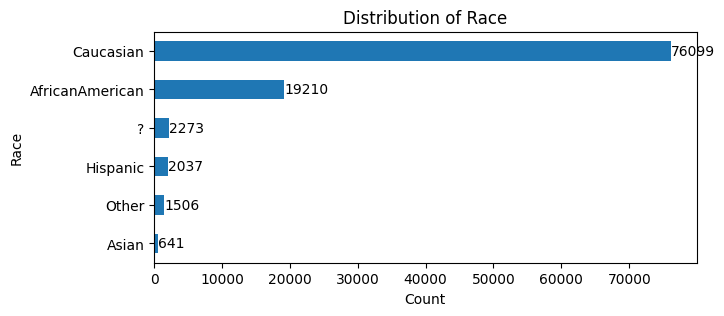

In [10]:
#2. race
race_counts = df['race'].value_counts().sort_values()
ax = race_counts.plot(kind='barh', figsize=(7,3))
plt.title('Distribution of Race')
plt.xlabel('Count')
plt.ylabel('Race')

for i, v in enumerate(race_counts):
    ax.text(v, i, str(v), color='black', va='center')

plt.show()

There are 6 distinct values in race feature including '?' missing character. As of now, we have decided to replace the missing data points values with 'Other' category, as most likely people who skip filling their race have done that because they couldn't find their race listed within the options.

In [11]:
df['race'] = df['race'].replace('?',np.nan)
df['race'].isna().sum()*100/df.shape[0]

np.float64(2.2335554114340743)

In [12]:
df['race'] = df['race'].replace('?', 'Other')

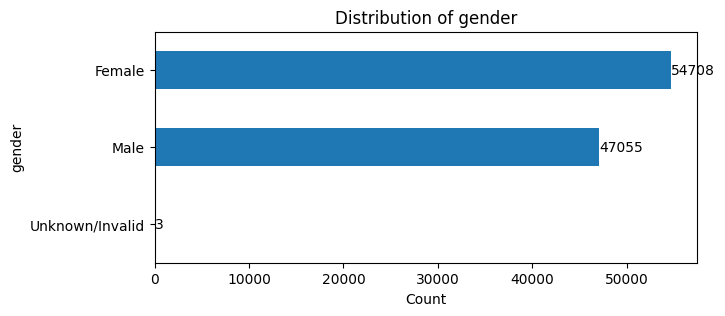

In [13]:
#3. gender
gender_counts = df['gender'].value_counts().sort_values()
ax = gender_counts.plot(kind='barh', figsize=(7,3))
plt.title('Distribution of gender')
plt.xlabel('Count')
plt.ylabel('gender')

for i, v in enumerate(gender_counts):
    ax.text(v, i, str(v), color='black', va='center')

plt.show()

- Observation: Dataset contains only 3 records from Unknown/Invalid group.
- Strategy: These 3 values can be replaced by the Mode of the dataset (Female)

In [14]:
df['gender'] = df['gender'].replace('Unknown/Invalid', 'Female')
df.gender.value_counts()

gender
Female    54711
Male      47055
Name: count, dtype: int64

There are 2 categories here: male, female which can be encoded as Female: 0 and Male: 1

In [15]:
# encoding gender
df['gender'] = df['gender'].replace({'Female' : 0, 'Male' : 1})

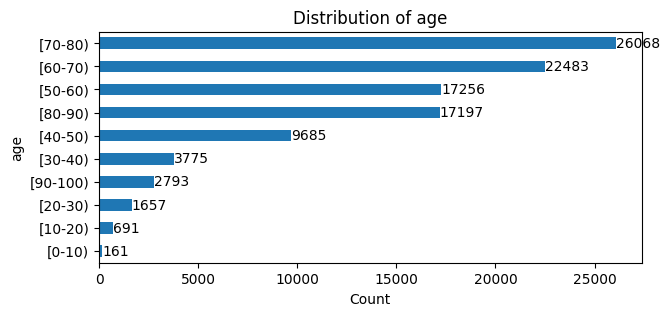

In [16]:
#4. age
age_counts = df.groupby('age').size().sort_values()
ax = age_counts.plot(kind='barh', figsize=(7,3))
plt.title('Distribution of age')
plt.xlabel('Count')
plt.ylabel('age')

for i, v in enumerate(age_counts):
    ax.text(v, i, str(v), color='black', va='center')

plt.show()

For age, we have 10 categories, each represents 10 years range from [0-10] to [90-100]. We will replace those with the middle age for each age range: for example (0,10] will be replaced with 5; (60, 70] will be replaces by 65; and so on.

In [17]:
for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i*10+5)
df['age'].value_counts()

age
75    26068
65    22483
55    17256
85    17197
45     9685
35     3775
95     2793
25     1657
15      691
5       161
Name: count, dtype: int64

In [18]:
#5. weights
df['weight'].value_counts(1)*100

weight
?            96.858479
[75-100)      1.312816
[50-75)       0.881434
[100-125)     0.614154
[125-150)     0.142484
[25-50)       0.095317
[0-25)        0.047167
[150-175)     0.034393
[175-200)     0.010809
>200          0.002948
Name: proportion, dtype: float64

Weight distributed into bins of 25 units, but 96.77% part of the weight has '?' values. But, this can have significance contribution to the data and future model prediction. Hence, creating a indicator column named 'has_weight' to where the value is present and dropping the original column

In [19]:
df['has_weight']=df['weight'].notnull().astype('int')
df.drop(['weight'],axis=1,inplace=True)

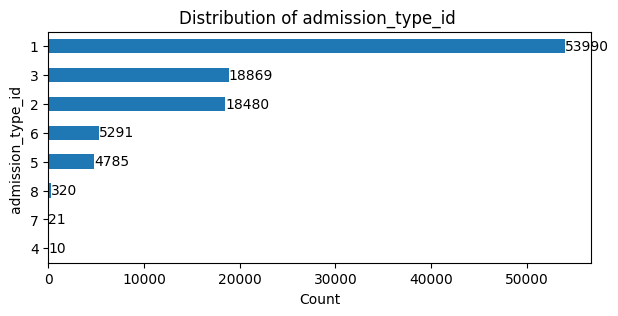

In [20]:
#6. admission_type_id
admission_type_id_counts = df.groupby('admission_type_id').size().sort_values()
ax = admission_type_id_counts.plot(kind='barh', figsize=(7,3))
plt.title('Distribution of admission_type_id ')
plt.xlabel('Count')
plt.ylabel('admission_type_id ')

for i, v in enumerate(admission_type_id_counts):
    ax.text(v, i, str(v), color='black', va='center')

plt.show()

admission_type_id description:

- These 8 values correspond to:
1. Emergency
2. Urgent
3. Elective
4. Newborn
5. Not Available
6. NULL
7. Trauma Center
8. Not Mapped

- From this description we can see that the majority patients that have been admitted in this hospital have an admission type as **Emergency**
- For further analysis we can merged these categories into less number of categories
- Emeregncy/Urgent/Trauma Center-TO-Emergency
- Not Available/Null/Not Mapped-TO-Not Available
- Elective & New Born remain same

In [21]:
df['admission_type_id']=df['admission_type_id'].replace({1:'Emergency',2:'Emergency',7:'Emergency',
                                                         5:'Not Available', 6:'Not Available', 8:'Not Available',
                                                         3:'Elective',4:'Newborn'})

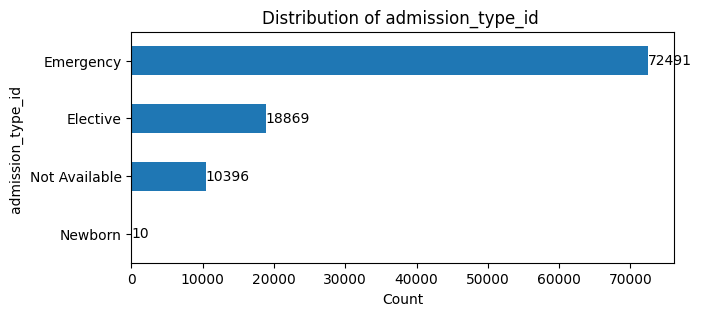

In [22]:
admission_type_id_counts = df.groupby('admission_type_id').size().sort_values()
ax = admission_type_id_counts.plot(kind='barh', figsize=(7,3))
plt.title('Distribution of admission_type_id ')
plt.xlabel('Count')
plt.ylabel('admission_type_id ')

for i, v in enumerate(admission_type_id_counts):
    ax.text(v, i, str(v), color='black', va='center')

plt.show()

**POINT OF CAUTION:** Once we check the 10 values for 'Newborn' data we can see quite the contradictory picture between age of patients and their admission type. All of these patients are over 50. This can be classified as 'Selection Bias'.

In [23]:
df[df['admission_type_id']== 'Newborn'][['gender','age','admission_type_id']]

,gender,age,admission_type_id
2043,1,55,Newborn
2203,1,85,Newborn
2461,1,75,Newborn
4823,0,65,Newborn
35877,1,65,Newborn
47548,1,45,Newborn
48711,0,75,Newborn
80354,0,5,Newborn
87714,1,65,Newborn
100721,1,85,Newborn


**Conclusion:** Dropping these values

In [24]:
df=df[df['admission_type_id']!='Newborn']

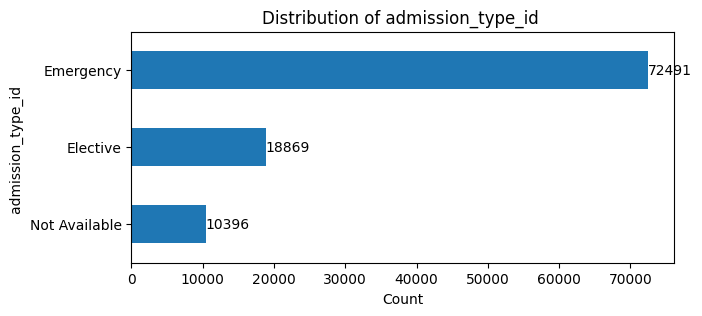

In [25]:
admission_type_id_counts = df.groupby('admission_type_id').size().sort_values()
ax = admission_type_id_counts.plot(kind='barh', figsize=(7,3))
plt.title('Distribution of admission_type_id ')
plt.xlabel('Count')
plt.ylabel('admission_type_id ')

for i, v in enumerate(admission_type_id_counts):
    ax.text(v, i, str(v), color='black', va='center')

plt.show()

The detailed list on the ID mapping has been provided in the UCI data package:
- https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008
- Out of the 26 values, most of the similar categories can be mapped together

In [26]:
#7. discharge_disposition_id
df['discharge_disposition_id']=df['discharge_disposition_id'].replace({
                                        1:'Discharged to home',
                                        2:'Transferred to another medical institution',
                                        3:'Transferred to another medical institution',
                                        4:'Transferred to another medical institution',
                                        5:'Transferred to another medical institution',
                                        16:'Transferred to another medical institution',
                                        22:'Transferred to another medical institution',
                                        23:'Transferred to another medical institution',
                                        24:'Transferred to another medical institution',
                                        27:'Transferred to another medical institution',
                                        28:'Transferred to another medical institution',
                                        29:'Transferred to another medical institution',
                                        30:'Transferred to another medical institution',
                                        6:'Discharged/transferred to home with home health service',
                                        8:'Discharged/transferred to home with home health service',
                                        7:'Left AMA',
                                        9:'Admitted patient/referred to this institution',
                                        12:'Admitted patient/referred to this institution',
                                        15:'Admitted patient/referred to this institution',
                                        17:'Admitted patient/referred to this institution',
                                        10:'Neonate discharged to another hospital',
                                        11:'Expired',
                                        19:'Expired',
                                        20:'Expired',
                                        21:'Expired',
                                        13:'Hospice',
                                        14:'Hospice',
                                        18:'Not Available',
                                        25:'Not Available',
                                        26:'Not Available'})

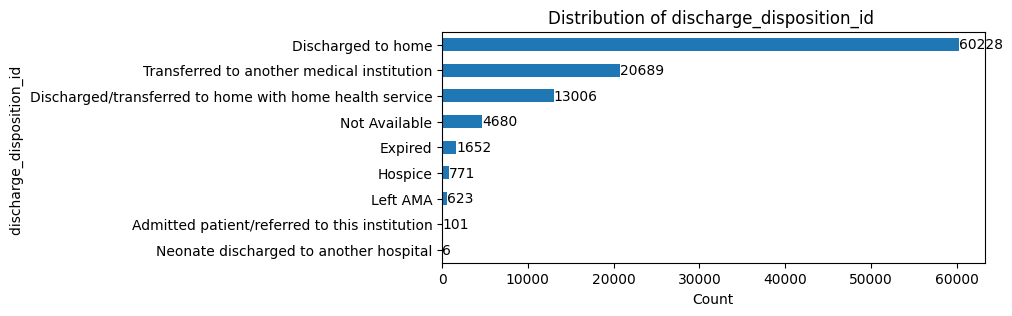

In [27]:
discharge_disposition_id_counts = df['discharge_disposition_id'].value_counts().sort_values()

ax = discharge_disposition_id_counts.plot(kind='barh', figsize=(7,3))
plt.title('Distribution of discharge_disposition_id ')
plt.xlabel('Count')
plt.ylabel('discharge_disposition_id ')

for i, v in enumerate(discharge_disposition_id_counts):
    ax.text(v, i, str(v), color='black', va='center')

plt.show()

- Observation:
  - Patients who have 'Expired' will not be readmitted
  - Neonate or newborn will create bias due to less chances of diabetic symptoms
  - Hospice patients will also create bias due to presence of terminally ill patients

- Conclusion: These records can be removed from the dataset

In [28]:
df=df[df['discharge_disposition_id']!='Expired']
df=df[df['discharge_disposition_id']!='Neonate discharged']
df=df[df['discharge_disposition_id']!='Hospice']

In [29]:
#8. admission_source_id
df['admission_source_id'].value_counts().sort_values()

admission_source_id
14        1
13        1
25        2
11        2
10        8
22       12
8        15
9       125
20      159
3       185
5       806
2      1081
6      2239
4      3113
17     6570
1     29166
7     55848
Name: count, dtype: int64

This is an integer identifier corresponding to 17 distinct values, for example, physician referral, emergency room, and transfer from a hospital.

The detailed list on the ID mapping has been provided in the UCI data package:
- https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008
- Out of the 17 values, most of the similar categories can be mapped together

In [30]:
df['admission_source_id']=df['admission_source_id'].replace({
                                   1:'Hospital Referral',
                                   2:'Hospital Referral',
                                   3:'Hospital Referral',
                                   4:'Transferred from another health care facility',
                                   5:'Transferred from another health care facility',
                                   6:'Transferred from another health care facility',
                                   10:'Transferred from another health care facility',
                                   18:'Transferred from another health care facility',
                                   19:'Transferred from another health care facility',
                                   22:'Transferred from another health care facility',
                                   25:'Transferred from another health care facility',
                                   26:'Transferred from another health care facility',
                                   7:'Emergency',
                                   8:'Emergency',
                                   9:'Not Available',
                                   15:'Not Available',
                                   17:'Not Available',
                                   20:'Not Available',
                                   21:'Not Available',
                                   11:'Newborn',
                                   12:'Newborn',
                                   13:'Newborn',
                                   14:'Newborn',
                                   23:'Newborn',
                                   24:'Newborn'})

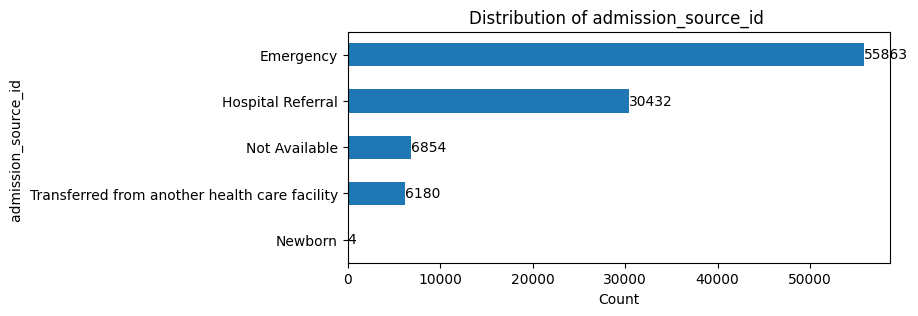

In [31]:
admission_source_id_counts = df['admission_source_id'].value_counts().sort_values()

ax = admission_source_id_counts.plot(kind='barh', figsize=(7,3))
plt.title('Distribution of admission_source_id ')
plt.xlabel('Count')
plt.ylabel('admission_source_id ')

for i, v in enumerate(admission_source_id_counts):
    ax.text(v, i, str(v), color='black', va='center')

plt.show()

In [32]:
df[df['admission_source_id']=='Newborn'][['gender','age','admission_source_id']]

,gender,age,admission_source_id
83432,0,75,Newborn
83510,0,25,Newborn
85588,0,75,Newborn
97384,1,75,Newborn


**POINT OF CAUTION:** Once we check the 4 values for 'Newborn' data we can see quite the contradictory picture between age of patients and their admission_source_id. This can also be classified as 'Selection Bias'.

**Conclusion:** Dropping these values

In [33]:
df=df[df['admission_source_id']!='Newborn']

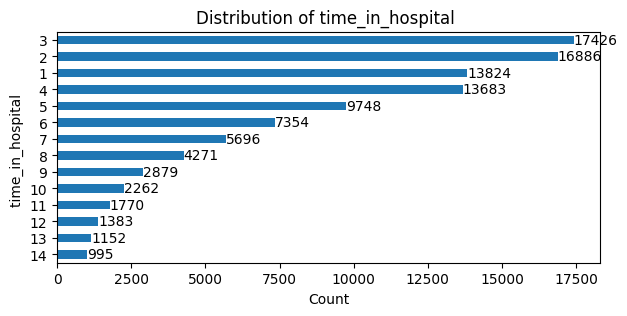

In [34]:
#9. time_in_hospital: number of days between admission and discharge
time_in_hospital_counts = df['time_in_hospital'].value_counts().sort_values()

ax = time_in_hospital_counts.plot(kind='barh', figsize=(7,3))
plt.title('Distribution of time_in_hospital ')
plt.xlabel('Count')
plt.ylabel('time_in_hospital ')

for i, v in enumerate(time_in_hospital_counts):
    ax.text(v, i, str(v), color='black', va='center')

plt.show()

Patients have spent 1 to 14 days in the hospital during their treatment period.

In [35]:
#10. payer_code
df['payer_code'].value_counts(1)*100

payer_code
?     39.659113
MC    31.543658
HM     6.236849
SP     4.974378
BC     4.632081
MD     3.495454
CP     2.480645
UN     2.426280
CM     1.888673
OG     1.017830
PO     0.588952
DM     0.548682
CH     0.142959
WC     0.135912
OT     0.092621
MP     0.079534
SI     0.055372
FR     0.001007
Name: proportion, dtype: float64

- payer_code has 39.65% of the '?' values

**Conclusion:** Dropping payer_code columns, as this a identifier column corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay (method of payments) and does not correspond to patient re-admission.

In [36]:
df.drop(['payer_code'],axis=1,inplace=True)

In [37]:
#11. medical_specialty
df['medical_specialty'].value_counts(1)*100

medical_specialty
?                         48.933343
InternalMedicine          14.331162
Emergency/Trauma           7.469118
Family/GeneralPractice     7.299983
Cardiology                 5.314661
                            ...    
Proctology                 0.001007
Speech                     0.001007
SportsMedicine             0.001007
Perinatology               0.001007
Neurophysiology            0.001007
Name: proportion, Length: 73, dtype: float64

- medical_specialty has 48.93% of the '?' values

**Conclusion:** Dropping medical_specialty column, as this a identifier coloumn specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon. Should not have influence over patient re-admission.

In [38]:
df.drop(['medical_specialty'],axis=1,inplace=True)

In [39]:
#12. num_lab_procedures
print('The highest number of lab procedure: ',df['num_lab_procedures'].max())
print('The lowest number of lab procedure: ',df['num_lab_procedures'].min())

The highest number of lab procedure:  132
The lowest number of lab procedure:  1


In [ ]:
df['num_lab_procedures'].loc[(df['num_lab_procedures']>=1) & (df['num_lab_procedures']< 20)] = 1
df['num_lab_procedures'].loc[(df['num_lab_procedures']>=20) & (df['num_lab_procedures']< 40)] = 2
df['num_lab_procedures'].loc[(df['num_lab_procedures']>=40) & (df['num_lab_procedures']< 60)] = 3
df['num_lab_procedures'].loc[(df['num_lab_procedures']>=60) & (df['num_lab_procedures']< 80)] = 4
df['num_lab_procedures'].loc[(df['num_lab_procedures']>=80) & (df['num_lab_procedures']< 100)] = 5
df['num_lab_procedures'].loc[(df['num_lab_procedures']>=100)] = 5

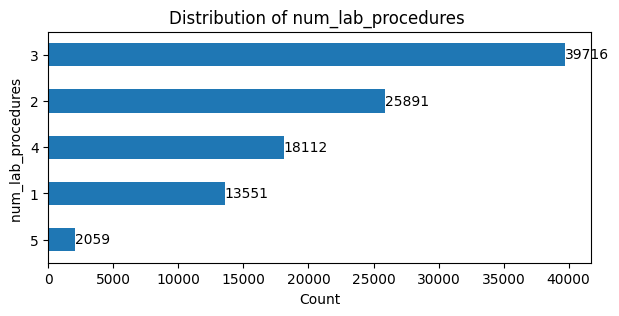

In [41]:
num_lab_procedures_counts = df['num_lab_procedures'].value_counts().sort_values()

ax = num_lab_procedures_counts.plot(kind='barh', figsize=(7,3))
plt.title('Distribution of num_lab_procedures ')
plt.xlabel('Count')
plt.ylabel('num_lab_procedures ')

for i, v in enumerate(num_lab_procedures_counts):
    ax.text(v, i, str(v), color='black', va='center')

plt.show()

- Observation: Highest number of patients have gone through 40 to 60 lab procedures

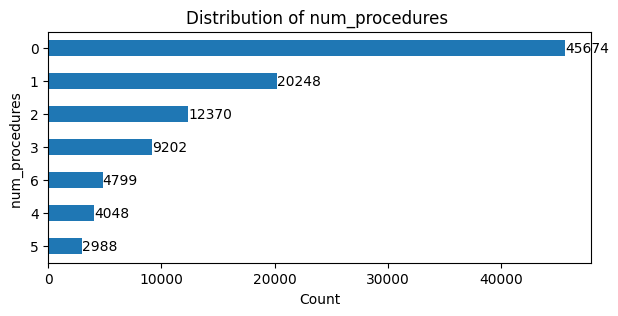

In [42]:
#13. num_procedures
num_procedures_counts = df['num_procedures'].value_counts().sort_values()

ax = num_procedures_counts.plot(kind='barh', figsize=(7,3))
plt.title('Distribution of num_procedures ')
plt.xlabel('Count')
plt.ylabel('num_procedures ')

for i, v in enumerate(num_procedures_counts):
    ax.text(v, i, str(v), color='black', va='center')

plt.show()

- Observation: Most patients have not gone through any further procedures (other than lab tests) performed during the encounter

In [43]:
#15. number_outpatient: Number of outpatient visits of the patient in the year preceding the encounter
#16. number_emergency : Number of emergency visits of the patient in the year preceding the encounter
#17. number_inpatient: Number of inpatient visits of the patient in the year preceding the encounter

- Creating a new column number_preceding_year_visits by combining above three column values and dropping the original columns

In [44]:
df['number_preceding_year_visits']=df['number_outpatient']+df['number_emergency']+df['number_inpatient']
df = df.drop(columns=['number_outpatient', 'number_emergency','number_inpatient'])

In [45]:
#18. diag_1: The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
#19. diag_2: Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
#20. diag_3: Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values

- The full list of ICD-9 code (https://en.wikipedia.org/wiki/List_of_ICD-9_codes)
- The distinct values can grouped into one of 18 generic health problems, depending on the first 3 digits as following:

- 001–139: infectious and parasitic diseases
- 140–239: neoplasms
- 240–279: endocrine, nutritional and metabolic diseases, and immunity disorders
- 280–289: diseases of the blood and blood-forming organs
- 290–319: mental disorders
- 320–389: diseases of the nervous system and sense organs
- 390–459: diseases of the circulatory system
- 460–519: diseases of the respiratory system
- 520–579: diseases of the digestive system
- 580–629: diseases of the genitourinary system
- 630–679: complications of pregnancy, childbirth, and the puerperium
- 680–709: diseases of the skin and subcutaneous tissue
- 710–739: diseases of the musculoskeletal system and connective tissue
- 740–759: congenital anomalies
- 760–779: certain conditions originating in the perinatal period
- 780–799: symptoms, signs, and ill-defined conditions
- 800–999: injury and poisoning
- E and V codes: external causes of injury and supplemental classification

In [46]:
#start by setting all values containing E or V into 0 (as one category)
df.loc[df['diag_1'].str.contains('V',na=False,case=False), 'diag_1'] = 0
df.loc[df['diag_1'].str.contains('E',na=False,case=False), 'diag_1'] = 0
df.loc[df['diag_2'].str.contains('V',na=False,case=False), 'diag_2'] = 0
df.loc[df['diag_2'].str.contains('E',na=False,case=False), 'diag_2'] = 0
df.loc[df['diag_3'].str.contains('V',na=False,case=False), 'diag_3'] = 0
df.loc[df['diag_3'].str.contains('E',na=False,case=False), 'diag_3'] = 0

#setting all missing values into -1
df['diag_1'] = df['diag_1'].replace('?', -1)
df['diag_2'] = df['diag_2'].replace('?', -1)
df['diag_3'] = df['diag_3'].replace('?', -1)

#No all diag values can be converted into numeric values
df['diag_1'] = df['diag_1'].astype(float)
df['diag_2'] = df['diag_2'].astype(float)
df['diag_3'] = df['diag_3'].astype(float)

In [47]:
#Now we will reduce the number of categories in diag features according to ICD-9 code
#(Missing values will be grouped as E & V values)
df['diag_1'].loc[(df['diag_1']>=1) & (df['diag_1']< 140)] = 1
df['diag_1'].loc[(df['diag_1']>=140) & (df['diag_1']< 240)] = 2
df['diag_1'].loc[(df['diag_1']>=240) & (df['diag_1']< 280)] = 3
df['diag_1'].loc[(df['diag_1']>=280) & (df['diag_1']< 290)] = 4
df['diag_1'].loc[(df['diag_1']>=290) & (df['diag_1']< 320)] = 5
df['diag_1'].loc[(df['diag_1']>=320) & (df['diag_1']< 390)] = 6
df['diag_1'].loc[(df['diag_1']>=390) & (df['diag_1']< 460)] = 7
df['diag_1'].loc[(df['diag_1']>=460) & (df['diag_1']< 520)] = 8
df['diag_1'].loc[(df['diag_1']>=520) & (df['diag_1']< 580)] = 9
df['diag_1'].loc[(df['diag_1']>=580) & (df['diag_1']< 630)] = 10
df['diag_1'].loc[(df['diag_1']>=630) & (df['diag_1']< 680)] = 11
df['diag_1'].loc[(df['diag_1']>=680) & (df['diag_1']< 710)] = 12
df['diag_1'].loc[(df['diag_1']>=710) & (df['diag_1']< 740)] = 13
df['diag_1'].loc[(df['diag_1']>=740) & (df['diag_1']< 760)] = 14
df['diag_1'].loc[(df['diag_1']>=760) & (df['diag_1']< 780)] = 15
df['diag_1'].loc[(df['diag_1']>=780) & (df['diag_1']< 800)] = 16
df['diag_1'].loc[(df['diag_1']>=800) & (df['diag_1']< 1000)] = 17
df['diag_1'].loc[(df['diag_1']==-1)] = 0

df['diag_2'].loc[(df['diag_2']>=1) & (df['diag_2']< 140)] = 1
df['diag_2'].loc[(df['diag_2']>=140) & (df['diag_2']< 240)] = 2
df['diag_2'].loc[(df['diag_2']>=240) & (df['diag_2']< 280)] = 3
df['diag_2'].loc[(df['diag_2']>=280) & (df['diag_2']< 290)] = 4
df['diag_2'].loc[(df['diag_2']>=290) & (df['diag_2']< 320)] = 5
df['diag_2'].loc[(df['diag_2']>=320) & (df['diag_2']< 390)] = 6
df['diag_2'].loc[(df['diag_2']>=390) & (df['diag_2']< 460)] = 7
df['diag_2'].loc[(df['diag_2']>=460) & (df['diag_2']< 520)] = 8
df['diag_2'].loc[(df['diag_2']>=520) & (df['diag_2']< 580)] = 9
df['diag_2'].loc[(df['diag_2']>=580) & (df['diag_2']< 630)] = 10
df['diag_2'].loc[(df['diag_2']>=630) & (df['diag_2']< 680)] = 11
df['diag_2'].loc[(df['diag_2']>=680) & (df['diag_2']< 710)] = 12
df['diag_2'].loc[(df['diag_2']>=710) & (df['diag_2']< 740)] = 13
df['diag_2'].loc[(df['diag_2']>=740) & (df['diag_2']< 760)] = 14
df['diag_2'].loc[(df['diag_2']>=760) & (df['diag_2']< 780)] = 15
df['diag_2'].loc[(df['diag_2']>=780) & (df['diag_2']< 800)] = 16
df['diag_2'].loc[(df['diag_2']>=800) & (df['diag_2']< 1000)] = 17
df['diag_2'].loc[(df['diag_2']==-1)] = 0

df['diag_3'].loc[(df['diag_3']>=1) & (df['diag_3']< 140)] = 1
df['diag_3'].loc[(df['diag_3']>=140) & (df['diag_3']< 240)] = 2
df['diag_3'].loc[(df['diag_3']>=240) & (df['diag_3']< 280)] = 3
df['diag_3'].loc[(df['diag_3']>=280) & (df['diag_3']< 290)] = 4
df['diag_3'].loc[(df['diag_3']>=290) & (df['diag_3']< 320)] = 5
df['diag_3'].loc[(df['diag_3']>=320) & (df['diag_3']< 390)] = 6
df['diag_3'].loc[(df['diag_3']>=390) & (df['diag_3']< 460)] = 7
df['diag_3'].loc[(df['diag_3']>=460) & (df['diag_3']< 520)] = 8
df['diag_3'].loc[(df['diag_3']>=520) & (df['diag_3']< 580)] = 9
df['diag_3'].loc[(df['diag_3']>=580) & (df['diag_3']< 630)] = 10
df['diag_3'].loc[(df['diag_3']>=630) & (df['diag_3']< 680)] = 11
df['diag_3'].loc[(df['diag_3']>=680) & (df['diag_3']< 710)] = 12
df['diag_3'].loc[(df['diag_3']>=710) & (df['diag_3']< 740)] = 13
df['diag_3'].loc[(df['diag_3']>=740) & (df['diag_3']< 760)] = 14
df['diag_3'].loc[(df['diag_3']>=760) & (df['diag_3']< 780)] = 15
df['diag_3'].loc[(df['diag_3']>=780) & (df['diag_3']< 800)] = 16
df['diag_3'].loc[(df['diag_3']>=800) & (df['diag_3']< 1000)] = 17
df['diag_3'].loc[(df['diag_3']==-1)] = 0

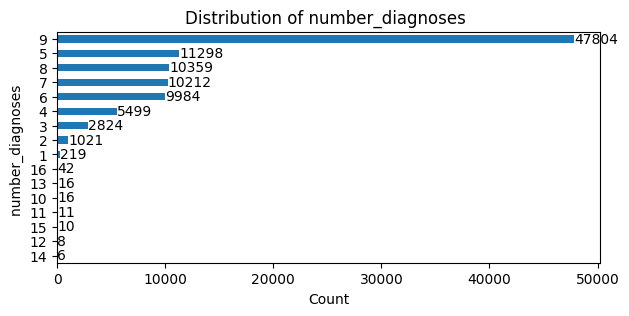

In [48]:
#21. number_diagnoses
number_diagnoses_counts = df['number_diagnoses'].value_counts().sort_values()

ax = number_diagnoses_counts.plot(kind='barh', figsize=(7,3))
plt.title('Distribution of number_diagnoses ')
plt.xlabel('Count')
plt.ylabel('number_diagnoses ')

for i, v in enumerate(number_diagnoses_counts):
    ax.text(v, i, str(v), color='black', va='center')

plt.show()

- Observation: The number of diagonses entered into the system range from 1 to 16 with the most number of diagnosis being 9.

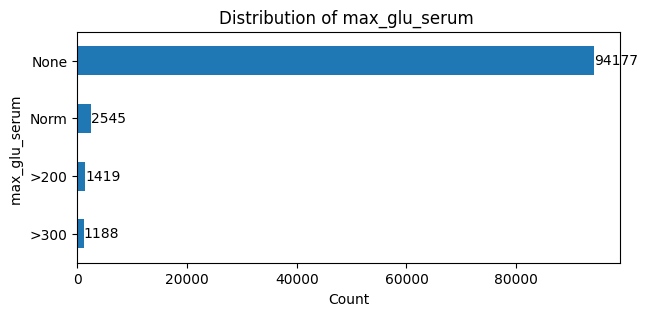

In [49]:
#22. max_glu_serum
df['max_glu_serum']=df['max_glu_serum'].replace(np.nan, "None")

max_glu_serum_counts = df['max_glu_serum'].value_counts().sort_values()

ax = max_glu_serum_counts.plot(kind='barh', figsize=(7,3))
plt.title('Distribution of max_glu_serum ')
plt.xlabel('Count')
plt.ylabel('max_glu_serum ')

for i, v in enumerate(max_glu_serum_counts):
    ax.text(v, i, str(v), color='black', va='center')

plt.show()

In [50]:
df['max_glu_serum']=df['max_glu_serum'].replace("None", 0)
df['max_glu_serum']=df['max_glu_serum'].replace("Norm", 1)
df['max_glu_serum']=df['max_glu_serum'].replace(">200", 2)
df['max_glu_serum']=df['max_glu_serum'].replace(">300", 3)
df.max_glu_serum.value_counts()

max_glu_serum
0    94177
1     2545
2     1419
3     1188
Name: count, dtype: int64

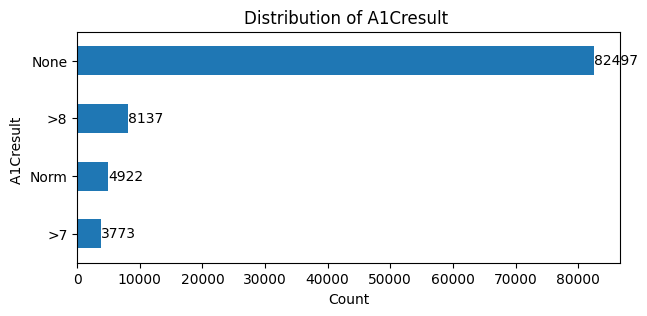

In [51]:
#23. A1Cresult
df['A1Cresult']=df['A1Cresult'].replace(np.nan, "None")

A1Cresult_counts = df['A1Cresult'].value_counts().sort_values()

ax = A1Cresult_counts.plot(kind='barh', figsize=(7,3))
plt.title('Distribution of A1Cresult ')
plt.xlabel('Count')
plt.ylabel('A1Cresult ')

for i, v in enumerate(A1Cresult_counts):
    ax.text(v, i, str(v), color='black', va='center')

plt.show()

- Observation: This range of the result or if the test was not taken. Values:
  - '>8' if the result was greater than 8%,
  - '>7' if the result was greater than 7% but less than 8%,
  - normal if the result was less than 7%, and
  - none if not measured

- From feature number 24 to 46, we have medicine names:
generic names : metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, and metformin-pioglitazone

- The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed


In [52]:
medicines = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

for i in medicines:
       print(i, df[i].unique())

metformin ['No' 'Steady' 'Up' 'Down']
repaglinide ['No' 'Up' 'Steady' 'Down']
nateglinide ['No' 'Steady' 'Down' 'Up']
chlorpropamide ['No' 'Steady' 'Down' 'Up']
glimepiride ['No' 'Steady' 'Down' 'Up']
acetohexamide ['No' 'Steady']
glipizide ['No' 'Steady' 'Up' 'Down']
glyburide ['No' 'Steady' 'Up' 'Down']
tolbutamide ['No' 'Steady']
pioglitazone ['No' 'Steady' 'Up' 'Down']
rosiglitazone ['No' 'Steady' 'Up' 'Down']
acarbose ['No' 'Steady' 'Up' 'Down']
miglitol ['No' 'Steady' 'Down' 'Up']
troglitazone ['No' 'Steady']
tolazamide ['No' 'Steady' 'Up']
examide ['No']
citoglipton ['No']
insulin ['No' 'Up' 'Steady' 'Down']
glyburide-metformin ['No' 'Steady' 'Down' 'Up']
glipizide-metformin ['No' 'Steady']
glimepiride-pioglitazone ['No' 'Steady']
metformin-rosiglitazone ['No' 'Steady']
metformin-pioglitazone ['No' 'Steady']


- **Observation:** We can drop columns - examide, citoglipton as these drugs were not prescribed to any patient.

In [53]:
df.drop(['examide', 'citoglipton'], axis = 1, inplace = True)

In [54]:
# encode prescribed medicines
prescribed_medicines = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

for i in prescribed_medicines:
    df[i] = df[i].replace({'No' : -2, 'Down' : -1, 'Steady' : 0, 'Up' : 1})

for i in prescribed_medicines:
    df[i] = df[i].astype('int64')

In [55]:
#47. change
df.change.value_counts()

change
No    53211
Ch    46118
Name: count, dtype: int64

In [56]:
# encode change column: Indicates if there was a change in diabetic medications (either dosage or generic name). Values: change and no change
# This can be replaced with No Change: 0 and Change: 1
df['change'] = df['change'].replace({'No' : 0, 'Ch' : 1})
df['change'].value_counts()

change
0    53211
1    46118
Name: count, dtype: int64

In [57]:
#48. diabetesMed
df['diabetesMed'].value_counts()

diabetesMed
Yes    76708
No     22621
Name: count, dtype: int64

In [58]:
# encode Indicates if there was any diabetic medication prescribed. Values: yes and no
# This can be replaced with No: 0 and Yes: 1
df['diabetesMed'] = df['diabetesMed'].replace({'No' : 0, 'Yes' : 1})
df['diabetesMed'].value_counts()

diabetesMed
1    76708
0    22621
Name: count, dtype: int64

- Target Column: **readmitted**

In [59]:
# 49: readmitted: Days to inpatient readmission. Values: <30 if the patient was readmitted in less than 30 days, >30 if the patient was readmitted in more than 30 days, and No for no record of readmission.

df['readmitted'].value_counts()

readmitted
NO     52516
>30    35500
<30    11313
Name: count, dtype: int64

- The outcome actually has < 30, > 30 and No Readmission categories.

- As per the problem statement we have to convert to binary classification:
 - Readmitted within 30 days → 1
 - Otherwise (">30" or "NO") → 0

In [60]:
df['readmitted'] = df['readmitted'].replace('>30', 'NO')
df['readmitted']= df['readmitted'].replace( {'NO': 0, '<30': 1} ).astype(int)

In [61]:
df.reset_index(drop = True, inplace = True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99329 entries, 0 to 99328
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   race                          97095 non-null  object 
 1   gender                        99329 non-null  int64  
 2   age                           99329 non-null  int64  
 3   admission_type_id             99329 non-null  object 
 4   discharge_disposition_id      99329 non-null  object 
 5   admission_source_id           99329 non-null  object 
 6   time_in_hospital              99329 non-null  int64  
 7   num_lab_procedures            99329 non-null  int64  
 8   num_procedures                99329 non-null  int64  
 9   num_medications               99329 non-null  int64  
 10  diag_1                        99329 non-null  float64
 11  diag_2                        99329 non-null  float64
 12  diag_3                        99329 non-null  float64
 13  n

Total number of features has been reduced to 40 discarding the target column (readmitted):

In [63]:
df_cat = df.select_dtypes(include=object)
df_num = df.select_dtypes(include=np.number)
print(f'Total categorical columns: ',len(df_cat.columns))
print(f'Categorical columns: ',df_cat.columns)
print(f'Total numerical columns : ',len(df_num.columns))
print(f'Numerical columns:',df_num.columns)

Total categorical columns:  5
Categorical columns:  Index(['race', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'A1Cresult'],
      dtype='object')
Total numerical columns :  37
Numerical columns: Index(['gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'has_weight', 'number_preceding_year_visits'],
      dtype='object')


In [64]:
cat_cols = ['race', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'A1Cresult']

num_cols = ['gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'has_weight', 'number_preceding_year_visits']

Chi Square for categorical v/s categorical and one way anova for categorical v/s numerical

In [65]:
#Statistical Tests (Chi Square and Anova)

p_val = []
sig = []
for i in df.columns:
    if i in num_cols:
        stat, p = stats.f_oneway(df[df['readmitted'] == 0][i], df[df['readmitted'] == 1][i])
    else:
        ct = pd.crosstab(df[i], df['readmitted'])
        stat, p, dof, exp = stats.chi2_contingency(ct)
    p_val.append(p)
    if p < 0.05:
        sig.append('Significant')
    else:
        sig.append("Insignificant")
stats_df = pd.DataFrame({"columns" : df.columns, "p_value" : p_val, "significance" : sig})

stats_df.sort_values(by='p_value',ascending = True)

,columns,p_value,significance
41,number_preceding_year_visits,0.000000e+00,Significant
39,readmitted,0.000000e+00,Significant
4,discharge_disposition_id,1.779497e-183,Significant
13,number_diagnoses,5.259039e-64,Significant
6,time_in_hospital,1.781592e-49,Significant
9,num_medications,1.448842e-38,Significant
31,insulin,1.394245e-18,Significant
16,metformin,1.068189e-16,Significant
38,diabetesMed,2.845296e-16,Significant
10,diag_1,3.411281e-15,Significant


In [66]:
sig_cols = stats_df[stats_df['significance'] == 'Significant']['columns'].reset_index(drop = True)
insig_cols = stats_df[stats_df['significance'] == 'Insignificant']['columns'].reset_index(drop = True)
print('Statiscally significant features are :','\n')
print(sig_cols)

Statiscally significant features are : 

0                              age
1                admission_type_id
2         discharge_disposition_id
3              admission_source_id
4                 time_in_hospital
5               num_lab_procedures
6                   num_procedures
7                  num_medications
8                           diag_1
9                           diag_3
10                number_diagnoses
11                   max_glu_serum
12                       A1Cresult
13                       metformin
14                     repaglinide
15                     glimepiride
16                       glyburide
17                    pioglitazone
18                   rosiglitazone
19                         insulin
20                          change
21                     diabetesMed
22                      readmitted
23    number_preceding_year_visits
Name: columns, dtype: object


In [67]:
prescribed_medicines = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

# Medicines given to less than 1% of the population
less_counts = []

for i in prescribed_medicines:
    vc = df[i].value_counts().values
    if vc[1:].sum() / vc[0] < 0.01:
        less_counts.append(i)

less_counts

['nateglinide',
 'chlorpropamide',
 'acetohexamide',
 'tolbutamide',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone']

- **Observation:** Drop these medicines as they are given to less than 1% of the population and they are statistically insignificat as well.

In [68]:
df = df.drop(['nateglinide',
 'chlorpropamide',
 'acetohexamide',
 'tolbutamide',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone'],axis=1)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99329 entries, 0 to 99328
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   race                          97095 non-null  object 
 1   gender                        99329 non-null  int64  
 2   age                           99329 non-null  int64  
 3   admission_type_id             99329 non-null  object 
 4   discharge_disposition_id      99329 non-null  object 
 5   admission_source_id           99329 non-null  object 
 6   time_in_hospital              99329 non-null  int64  
 7   num_lab_procedures            99329 non-null  int64  
 8   num_procedures                99329 non-null  int64  
 9   num_medications               99329 non-null  int64  
 10  diag_1                        99329 non-null  float64
 11  diag_2                        99329 non-null  float64
 12  diag_3                        99329 non-null  float64
 13  n

In [70]:
num_cols = ['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
            'number_diagnoses','number_preceding_year_visits']

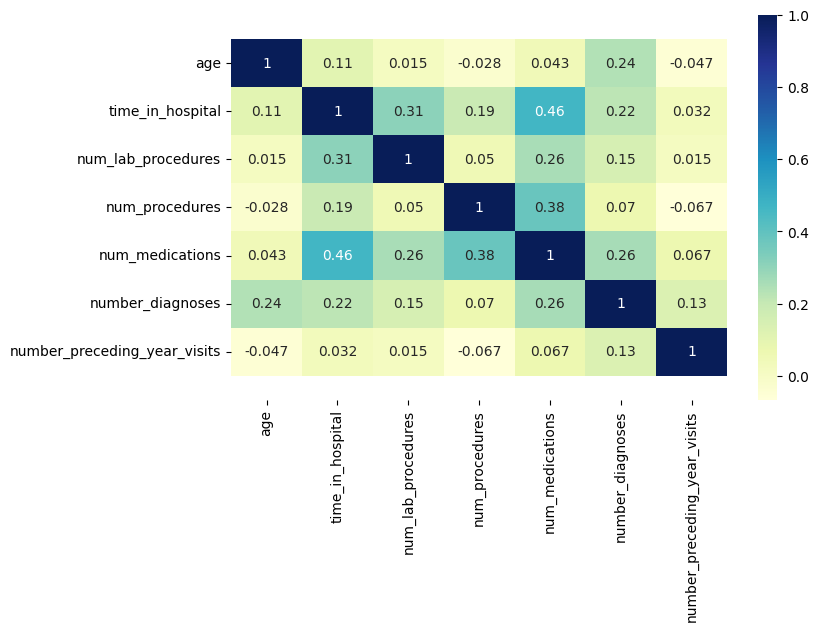

In [71]:
plt.figure(figsize=(8,5))
num_cols = [col for col in num_cols if col in df.columns]
corr=df[num_cols].corr()
sns.heatmap(corr,annot=True,cmap='YlGnBu')
b,t=plt.ylim()
plt.ylim(b+0.5,t-0.5)
plt.show()

- As it can be seen from correlation heatmap that there is no Multi-Collinearity in the numerical features.

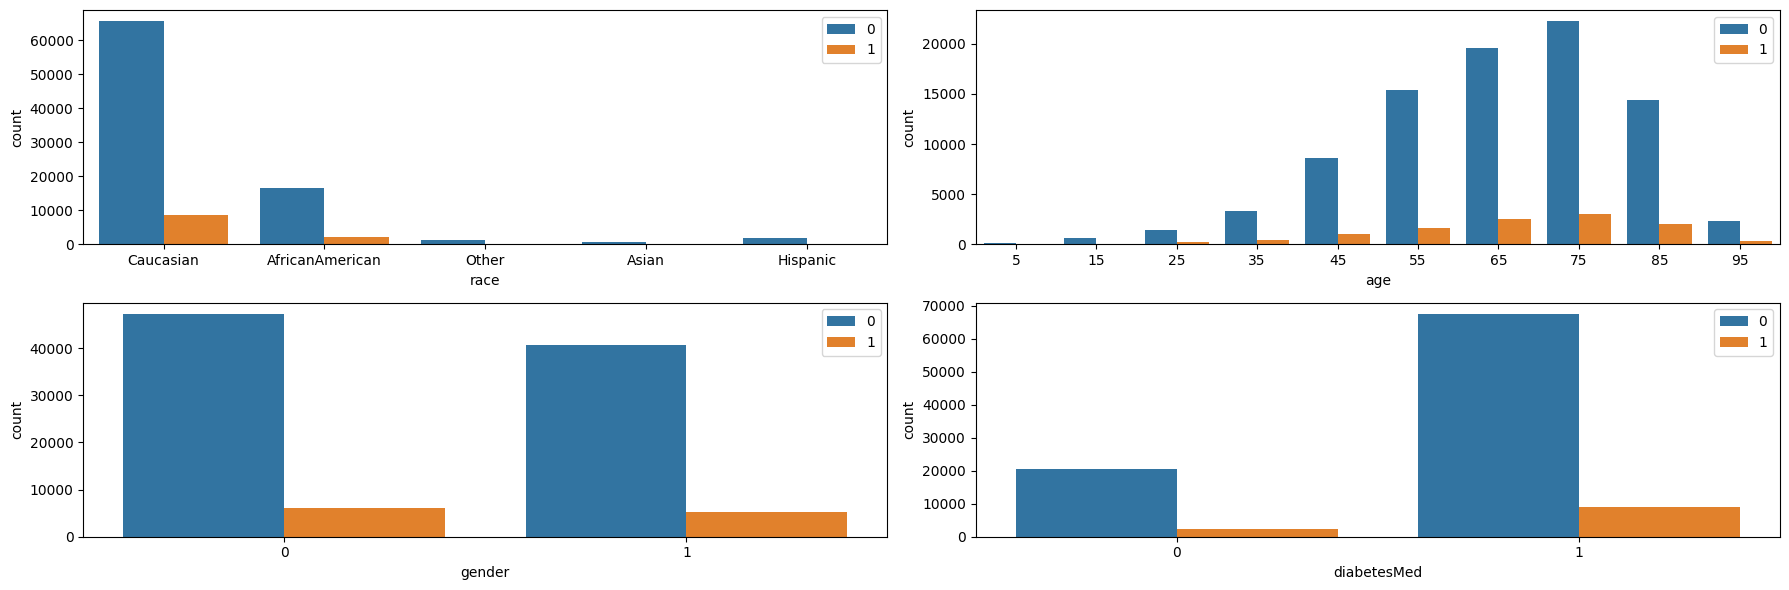

In [72]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.countplot(data=df, x='race', hue='readmitted', ax=ax1)
sns.countplot(data=df, x='age', hue='readmitted', ax=ax2)
sns.countplot(data=df, x='gender', hue='readmitted', ax=ax3)
sns.countplot(data=df, x='diabetesMed', hue='readmitted', ax=ax4)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')
plt.tight_layout()
plt.show()

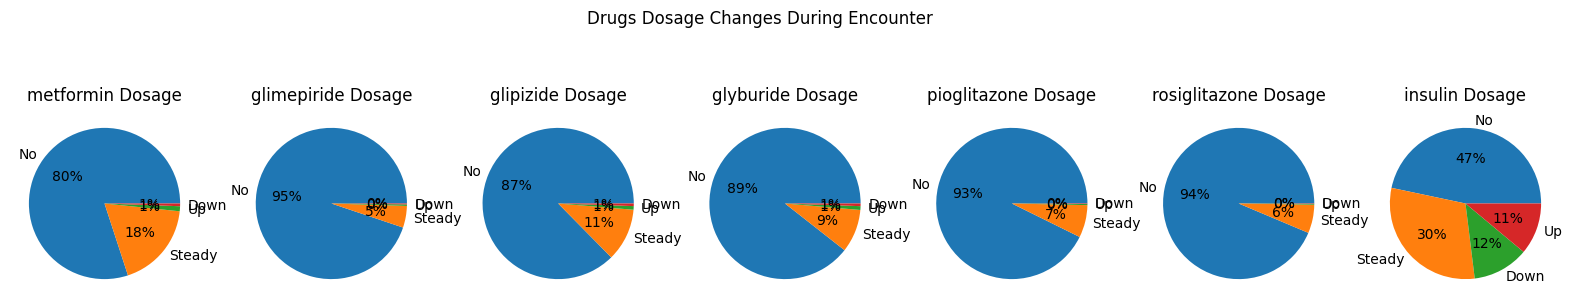

In [73]:
fig, ax = plt.subplots(1, 7,figsize=(20, 4), subplot_kw=dict(aspect="equal"))
ax[0].pie(df['metformin'].value_counts(), autopct='%1.0f%%', labels=['No', 'Steady', 'Up', 'Down'])
ax[0].set_title('metformin Dosage')
ax[1].pie(df['glimepiride'].value_counts(), autopct='%1.0f%%', labels=['No', 'Steady', 'Up', 'Down'])
ax[1].set_title('glimepiride Dosage')
ax[2].pie(df['glipizide'].value_counts(), autopct='%1.0f%%', labels=['No', 'Steady', 'Up', 'Down'])
ax[2].set_title('glipizide Dosage')
ax[3].pie(df['glyburide'].value_counts(), autopct='%1.0f%%', labels=['No', 'Steady', 'Up', 'Down'])
ax[3].set_title('glyburide Dosage')
ax[4].pie(df['pioglitazone'].value_counts(), autopct='%1.0f%%', labels=['No', 'Steady', 'Up', 'Down'])
ax[4].set_title('pioglitazone Dosage')
ax[5].pie(df['rosiglitazone'].value_counts(), autopct='%1.0f%%', labels=['No', 'Steady', 'Up', 'Down'])
ax[5].set_title('rosiglitazone Dosage')
ax[6].pie(df['insulin'].value_counts(), autopct='%1.0f%%', labels=['No', 'Steady', 'Down', 'Up'])
ax[6].set_title('insulin Dosage')

fig.suptitle('Drugs Dosage Changes During Encounter')
plt.show()

Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

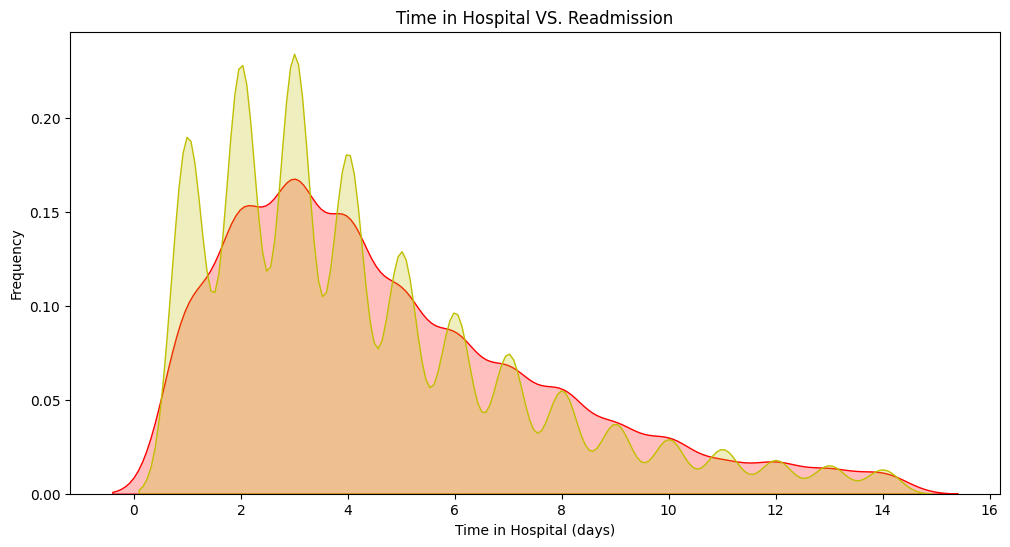

In [74]:
fig = plt.figure(figsize=(12,6))
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='No readmittion or Readmittion in >30 days')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='y',shade=True, label='Readmitted in <30 days')
ax.set(xlabel='Time in Hospital (days)', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

In [75]:
df.head(10)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,has_weight,number_preceding_year_visits
0,Caucasian,0,5,Not Available,Not Available,Hospital Referral,1,3,0,1,...,-2,-2,-2,-2,-2,0,0,0,1,0
1,Caucasian,0,15,Emergency,Discharged to home,Emergency,3,3,0,18,...,-2,-2,-2,-2,1,1,1,0,1,0
2,AfricanAmerican,0,25,Emergency,Discharged to home,Emergency,2,1,5,13,...,0,-2,-2,-2,-2,0,1,0,1,3
3,Caucasian,1,35,Emergency,Discharged to home,Emergency,2,3,1,16,...,-2,-2,-2,-2,1,1,1,0,1,0
4,Caucasian,1,45,Emergency,Discharged to home,Emergency,1,3,0,8,...,0,-2,-2,-2,0,1,1,0,1,0
5,Caucasian,1,55,Emergency,Discharged to home,Hospital Referral,3,2,6,16,...,-2,-2,-2,-2,0,0,1,0,1,0
6,Caucasian,1,65,Elective,Discharged to home,Hospital Referral,4,4,1,21,...,-2,-2,-2,-2,0,1,1,0,1,0
7,Caucasian,1,75,Emergency,Discharged to home,Emergency,5,4,0,12,...,-2,0,-2,-2,-2,0,1,0,1,0
8,Caucasian,0,85,Emergency,Discharged to home,Transferred from another health care facility,13,4,2,28,...,0,-2,-2,-2,0,1,1,0,1,0
9,Caucasian,0,95,Elective,Transferred to another medical institution,Transferred from another health care facility,12,2,3,18,...,-2,-2,-2,0,0,1,1,0,1,0


In [76]:
def display_unique_values(df):
    for column in df.columns:
        unique_vals = df[column].unique()
        print(f"Column: {column}")
        print(f"Unique values ({len(unique_vals)}): {unique_vals}")
        print("-" * 50)
print("\nUnique values in df:")        
display_unique_values(df)


Unique values in df:
Column: race
Unique values (6): ['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']
--------------------------------------------------
Column: gender
Unique values (2): [0 1]
--------------------------------------------------
Column: age
Unique values (10): [ 5 15 25 35 45 55 65 75 85 95]
--------------------------------------------------
Column: admission_type_id
Unique values (3): ['Not Available' 'Emergency' 'Elective']
--------------------------------------------------
Column: discharge_disposition_id
Unique values (7): ['Not Available' 'Discharged to home'
 'Transferred to another medical institution'
 'Discharged/transferred to home with home health service' 'Left AMA'
 'Neonate discharged to another hospital'
 'Admitted patient/referred to this institution']
--------------------------------------------------
Column: admission_source_id
Unique values (4): ['Hospital Referral' 'Emergency'
 'Transferred from another health care facility' 'Not Availa

In [77]:
a1c_map = {'None': 0, 'Norm': 1, '>7': 2, '>8': 3}
df['A1Cresult'] = df['A1Cresult'].map(a1c_map)

In [78]:
discharge_disposition_id_map = {
    'Not Available': 0,
    'Discharged to home': 1,
    'Transferred to another medical institution': 2,
    'Discharged/transferred to home with home health service': 3,
    'Left AMA': 4,
    'Neonate discharged to another hospital': 5,
    'Admitted patient/referred to this institution': 6
}

df['discharge_disposition_id'] = df['discharge_disposition_id'].map(discharge_disposition_id_map)
df['discharge_disposition_id'].value_counts()

discharge_disposition_id
1    60224
2    20689
3    13006
0     4680
4      623
6      101
5        6
Name: count, dtype: int64

In [79]:
admission_type_id_map = {'Emergency':0, 'Elective':1, 'Not Available':2}
df['admission_type_id'] = df['admission_type_id'].map(admission_type_id_map)

df['admission_type_id'].value_counts()

admission_type_id
0    70518
1    18667
2    10144
Name: count, dtype: int64

In [80]:
admission_source_id_map = {
    'Not Available': 0,
    'Hospital Referral': 1,
    'Emergency': 2,
    'Transferred from another health care facility': 3
}
df['admission_source_id'] = df['admission_source_id'].map(admission_source_id_map)
df['admission_source_id'].value_counts()

admission_source_id
2    55863
1    30432
0     6854
3     6180
Name: count, dtype: int64

In [81]:
race_map = {
    'Caucasian': 0,
    'AfricanAmerican': 1,
    'Asian': 2,
    'Hispanic': 3,
    'Other': 4,
}

df['race'] = df['race'].map(race_map)
df['race'].value_counts()

race
0.0    74213
1.0    18768
3.0     2015
4.0     1472
2.0      627
Name: count, dtype: int64

In [82]:
diabetes_meds = ['metformin', 'repaglinide', 'glimepiride', 'glipizide',
                 'glyburide', 'pioglitazone', 'rosiglitazone']

df['number_diabetes_meds'] = np.nan
for i in range(len(df)):
    n = 0
    for j in diabetes_meds:
        if df.loc[i, j] != -2:
            n += 1
    df.loc[i, 'number_diabetes_meds'] = n
df['number_diabetes_meds']=df['number_diabetes_meds'].astype('int64')
df['number_diabetes_meds'].value_counts()

number_diabetes_meds
0    53469
1    30981
2    12590
3     2226
4       62
5        1
Name: count, dtype: int64

7 different kind of medicines have been summerized into one column 'number_diabetes_meds' hence dropping the features from diabetes_meds

In [83]:
df=df.drop(columns=diabetes_meds)
df.reset_index(drop = True, inplace = True)

- admission_type_id and admission_source_id depict the same insight so, one of them can be dropped

In [84]:
df.drop('admission_source_id', axis=1, inplace=True)

In [85]:
df['race'] = df['race'].fillna(0.0)
df['race'].value_counts()

race
0.0    76447
1.0    18768
3.0     2015
4.0     1472
2.0      627
Name: count, dtype: int64

In [86]:
df.drop('has_weight', axis=1, inplace=True)
df.reset_index(drop = True, inplace = True)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99329 entries, 0 to 99328
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   race                          99329 non-null  float64
 1   gender                        99329 non-null  int64  
 2   age                           99329 non-null  int64  
 3   admission_type_id             99329 non-null  int64  
 4   discharge_disposition_id      99329 non-null  int64  
 5   time_in_hospital              99329 non-null  int64  
 6   num_lab_procedures            99329 non-null  int64  
 7   num_procedures                99329 non-null  int64  
 8   num_medications               99329 non-null  int64  
 9   diag_1                        99329 non-null  float64
 10  diag_2                        99329 non-null  float64
 11  diag_3                        99329 non-null  float64
 12  number_diagnoses              99329 non-null  int64  
 13  m

In [88]:
df.to_csv('diabetic_data_cleaned.csv', index = False)